In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('C:\\Users\\subal\\Downloads\\disney_plus_titles.csv')

In [6]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [10]:
data.describe()

,release_year
count,1368.000000
mean,2002.348684
std,22.127559
min,1928.000000
25%,1998.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [20]:
data.columns.values

array(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description'], dtype=object)

In [24]:
data.isna().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [26]:
questions=("1. What is the distribution of content types (Movies vs. TV Shows)?",
           "2. What are the most common ratings for content on Disney+?",
           "3. How has the number of releases changed over the years?",
           "4. What is the distribution of content duration (for Movies)?",
           "5. Which countries produce the most content on Disney+?",
           "6. What are the top genres listed for Disney+ content?",
           "7. How many titles have been added to Disney+ each month over time?")
questions

('1. What is the distribution of content types (Movies vs. TV Shows)?',
 '2. What are the most common ratings for content on Disney+?',
 '3. How has the number of releases changed over the years?',
 '4. What is the distribution of content duration (for Movies)?',
 '5. Which countries produce the most content on Disney+?',
 '6. What are the top genres listed for Disney+ content?',
 '7. How many titles have been added to Disney+ each month over time?')

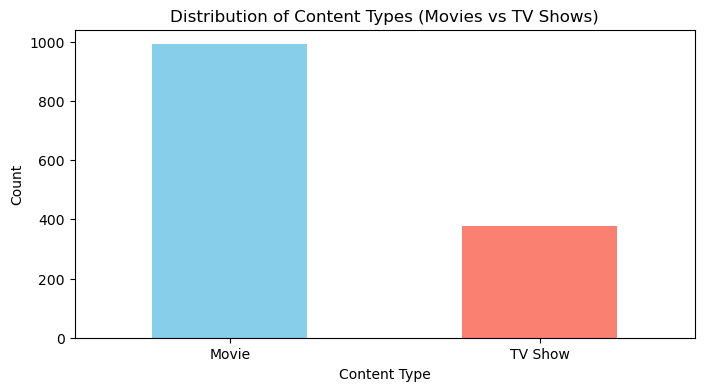

In [34]:
#1. What is the distribution of content types (Movies vs. TV Shows)?
import matplotlib.pyplot as plt
# Count the occurrences of each content type
content_type_counts = data['type'].value_counts()
# Create a bar chart
plt.figure(figsize=(8,4))
content_type_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Content Types (Movies vs TV Shows)')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

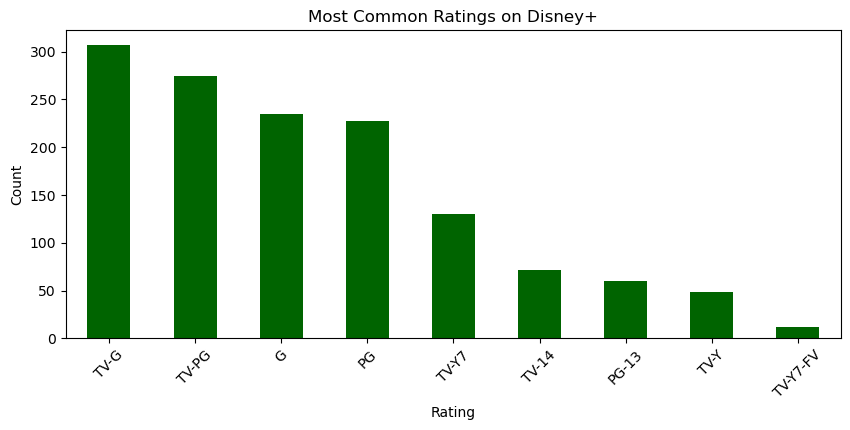

In [48]:
#2. What are the most common ratings for content on Disney+?
# Count the occurrences of each rating
rating_counts = data['rating'].value_counts()
# Create a bar chart
plt.figure(figsize=(10,4))
rating_counts.plot(kind='bar', color="darkgreen")
plt.title('Most Common Ratings on Disney+')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

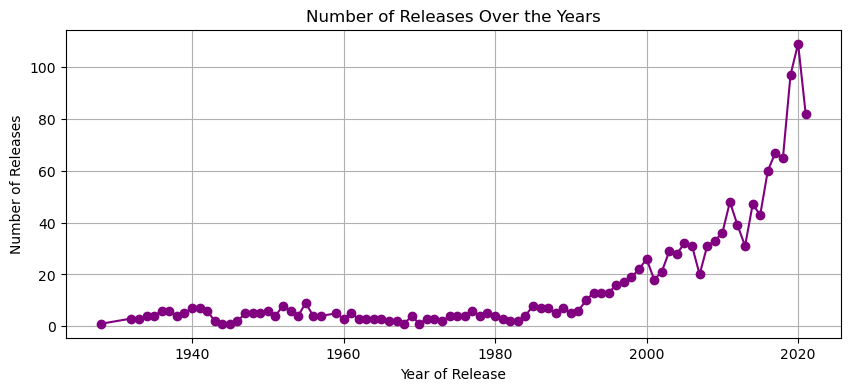

In [50]:
#3. How has the number of releases changed over the years?
# Count the number of releases per year
release_year_counts = data['release_year'].value_counts().sort_index()
# Create a line plot
plt.figure(figsize=(10,4))
release_year_counts.plot(kind='line', marker='o', color='purple')
plt.title('Number of Releases Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

C:\Users\subal\AppData\Local\Temp\ipykernel_15260\1737174908.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['duration'] = movies_data['duration'].str.replace(' min', '').astype(float)


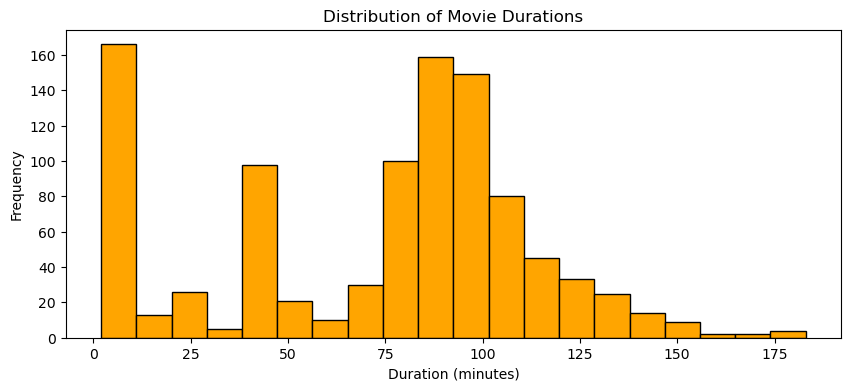

In [54]:
#4. What is the distribution of content duration (for Movies)?
# Filter only movies and extract durations (assuming they are in minutes)
movies_data = data[data['type'] == 'Movie']
movies_data['duration'] = movies_data['duration'].str.replace(' min', '').astype(float)
# Plot the distribution of movie durations
plt.figure(figsize=(10,4))
plt.hist(movies_data['duration'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

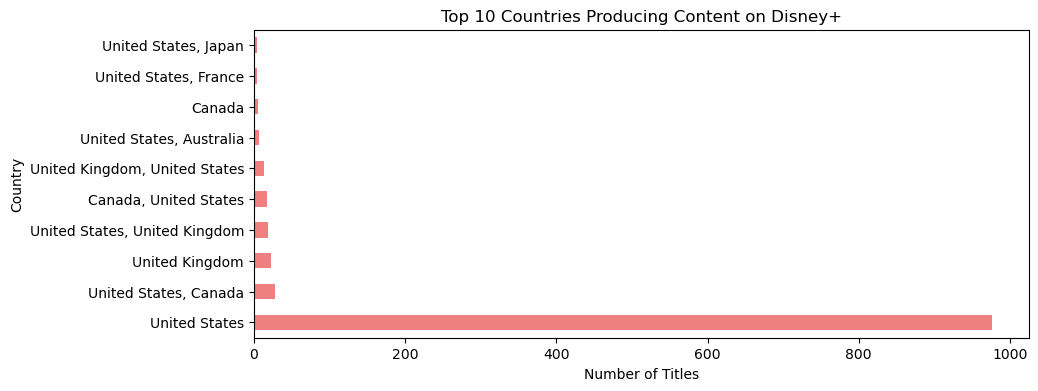

In [56]:
#5. Which countries produce the most content on Disney+?
# Count the occurrences of each country
country_counts = data['country'].value_counts().head(10)  # Top 10 countries
# Create a horizontal bar chart
plt.figure(figsize=(10,4))
country_counts.plot(kind='barh', color='lightcoral')
plt.title('Top 10 Countries Producing Content on Disney+')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

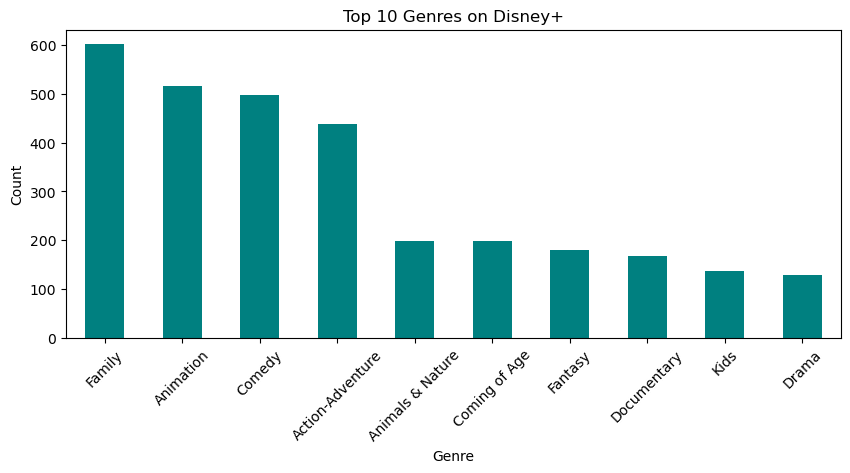

In [58]:
#6. What are the top genres listed for Disney+ content?
# Split the 'listed_in' column by commas and count the occurrences of each genre
genre_series = data['listed_in'].str.split(',').apply(lambda x: [i.strip() for i in x]).explode()
genre_counts = genre_series.value_counts().head(10)
# Create a bar chart
plt.figure(figsize=(10,4))
genre_counts.plot(kind='bar', color='teal')
plt.title('Top 10 Genres on Disney+')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

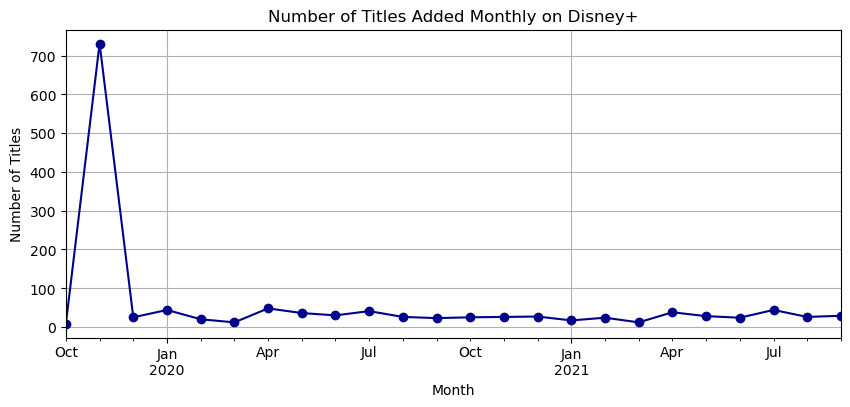

In [60]:
#7. How many titles have been added to Disney+ each month over time?
# Convert 'date_added' to datetime format
data['date_added'] = pd.to_datetime(data['date_added'])
# Group by month and year
monthly_added = data.groupby(data['date_added'].dt.to_period('M')).size()
# Create a line plot
plt.figure(figsize=(10,4))
monthly_added.plot(kind='line', marker='o', color='darkblue')
plt.title('Number of Titles Added Monthly on Disney+')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()